# HW 9.14:
A redo opportunity, to get the full problem right and study this specific Hamiltonian.

In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
Γ1 = 0.5
Γ2 = 0.25
α = 0.1 + 0.2j
H = Qobj([[Γ1, α, 0], [np.conj(α), Γ1, 0], [0, 0, Γ2]])
H

Quantum object: dims = [[3], [3]], shape = [3, 3], type = oper, isherm = True
Qobj data =
[[ 0.50+0.j   0.10+0.2j  0.00+0.j ]
 [ 0.10-0.2j  0.50+0.j   0.00+0.j ]
 [ 0.00+0.j   0.00+0.j   0.25+0.j ]]

In [9]:
# Make sure this is Hermitian:
H.isherm

True

In [26]:
energies, [E1, E2, E3] = H.eigenstates()

In [27]:
energies

array([ 0.25     ,  0.2763932,  0.7236068])

In [28]:
print(Γ2)
print(Γ1 + np.abs(α))
print(Γ1 - np.abs(α))

0.25
0.72360679775
0.27639320225


### These agree with
$\Gamma_2$ and $\Gamma_1 \pm |\alpha|$

In [31]:
E1

Quantum object: dims = [[3], [1]], shape = [3, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 1.]]

In [32]:
E2

Quantum object: dims = [[3], [1]], shape = [3, 1], type = ket
Qobj data =
[[ 0.70710678+0.j        ]
 [-0.31622777+0.63245553j]
 [ 0.00000000+0.j        ]]

In [33]:
E3

Quantum object: dims = [[3], [1]], shape = [3, 1], type = ket
Qobj data =
[[-0.70710678+0.j        ]
 [-0.31622777+0.63245553j]
 [ 0.00000000+0.j        ]]

### Now write the state $\big|a\big\rangle$ in terms of the energy eigenstates

In [21]:
a = Qobj([[1],[0],[0]])
a

Quantum object: dims = [[3], [1]], shape = [3, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]]

In [34]:
a.dag()*E1

Quantum object: dims = [[1], [1]], shape = [1, 1], type = oper, isherm = True
Qobj data =
[[ 0.]]

In [35]:
a.dag()*E2

Quantum object: dims = [[1], [1]], shape = [1, 1], type = oper, isherm = True
Qobj data =
[[ 0.70710678]]

In [36]:
a.dag()*E3

Quantum object: dims = [[1], [1]], shape = [1, 1], type = oper, isherm = True
Qobj data =
[[-0.70710678]]

### And write  $\big|b\big\rangle$ in terms of the energy eigenstates 

In [38]:
b = Qobj([[0],[1],[0]])

In [39]:
b.dag()*E1

Quantum object: dims = [[1], [1]], shape = [1, 1], type = oper, isherm = True
Qobj data =
[[ 0.]]

In [41]:
b.dag()*E2

Quantum object: dims = [[1], [1]], shape = [1, 1], type = oper, isherm = False
Qobj data =
[[-0.31622777+0.63245553j]]

In [42]:
b.dag()*E3

Quantum object: dims = [[1], [1]], shape = [1, 1], type = oper, isherm = False
Qobj data =
[[-0.31622777+0.63245553j]]

### Solve for the time dynamics

In [69]:
N = 100
T = 2*np.pi/np.abs(α)   # period of oscillation
tlist = np.linspace(0,T,N)
proj_b = b.dag()*b
solution = sesolve(H, a, tlist, proj_b)

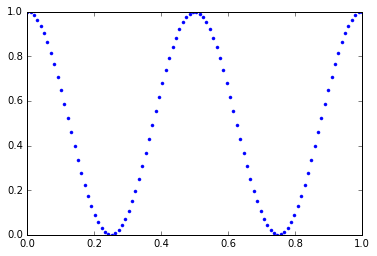

In [70]:
plt.plot(tlist/T,solution.expect[0],".")

### Consistent with $P(b,t) = \sin^2(|\alpha|t/\hbar)$